# Dynamic Programming, Frozen Lake

### Import Packages

In [4]:
import numpy as np
import copy

import check_test
from frozenlake import FrozenLakeEnv
from plot_utils import plot_values

### Set Environment

**Environment Note:**

The agent moves through a **$4 \times 4$ gridworld**, with states numbered as follows:
```
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
```
and the agent has **4 potential actions**:
```
LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3
```



In [11]:
env = FrozenLakeEnv(is_slippery=True)

In [28]:
# print the state space and action space, total number of states and actions
print(f'state space: {env.observation_space}')
print(f'Action_space: {env.action_space}')
print(f'total number of states: {env.nS}')
print(f'total number of actions: {env.nA}')

state space: Discrete(16)
Action_space: Discrete(4)
total number of states: 16
total number of actions: 4


In [25]:
# looking at the 
prob, next_state, reward, done = env.P[1][0][0] 

In [19]:
policy = np.zeros([env.nS, env.nA])
policy

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

- `env`: This is an instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `policy`: This is a 2D numpy array with `policy.shape[0]` equal to the number of states (`env.nS`), and `policy.shape[1]` equal to the number of actions (`env.nA`).  `policy[s][a]` returns the probability that the agent takes action `a` while in state `s` under the policy.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).
- `theta`: This is a very small positive number that is used to decide if the estimate has sufficiently converged to the true value function (default value: `1e-8`).

In [51]:
env.P[10][]

[(0.3333333333333333, 9, 0.0, False),
 (0.3333333333333333, 14, 0.0, False),
 (0.3333333333333333, 11, 0.0, True)]

In [ ]:
def policy_evaluation(env, policy, gamma=1, theta=1e-8):
    V = np.zeros(env.nS)
    while True:
        delta = 0
        for s in range(env.nS):                                                  # loop for every state
            Vs = 0
            for a, action_prob in enumerate(policy[s]):                          # loop for every action
                for prob, next_state, reward, done in env.P[s][a]:               # loop for every probability of each possible reward and next state 
                    Vs += action_prob * prob * (reward + gamma * V[next_state])  # calculate Vscore
            delta = max(delta, np.abs(V[s]-Vs))                                  # calculate delta
            V[s] = Vs                                                            # update state-value ?? based on what ??
        if delta < theta:                                                        # check process, if all state has been optimized (small delta, than)
            break
    return V                                                                     # look for that video that show the gradual change

In [53]:
random_policy = np.ones([env.nS, env.nA]) / env.nA

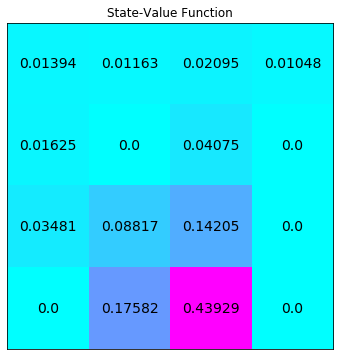

In [57]:
# evaluate the policy 
V = policy_evaluation(env, random_policy)

plot_values(V)

In [ ]:
check_test.run_check('policy_evaluation_check', policy_evaluation)